# "Implementing Naive Bayes Classifier using Python"

> "Explore how to implement the Naive Bayes Classifier in Python using a real-life dataset"


- toc: false
- branch: master
- badges: true
- comments: true
- author: Ijeoma Odoko
- categories: [python, supervised_machine_learning, probablistic_classifiers, naive_bayes]

## About 

Explore how to implement the Naive Bayes Classifier in Python using a [dataset](https://archive.ics.uci.edu/ml/datasets/HCV+data) from the UCI Machine Learning Repository.  


### Dataset info

"The target attribute for classification is Category (blood donors vs. Hepatitis C (including its progress ('just' Hepatitis C, Fibrosis, Cirrhosis)"




**DataSet Source:**


Creators: Ralf Lichtinghagen, Frank Klawonn, Georg Hoffmann

Donor: Ralf Lichtinghagen: Institute of Clinical Chemistry; Medical University Hannover (MHH); Hannover, Germany; lichtinghagen.ralf '@' mh-hannover.de

Donor: Frank Klawonn; Helmholtz Centre for Infection Research; Braunschweig, Germany; frank.klawonn '@' helmholtz-hzi.de

Donor: Georg Hoffmann; Trillium GmbH; Grafrath, Germany; georg.hoffmann '@' trillium.de

### What is the Naive Bayes classifier

[Naive Bayes classifier](https://en.wikipedia.org/wiki/Naive_Bayes_classifier) is considered to be a family of **supervised learning algorithms** known as ['probablistic classifiers'](https://en.wikipedia.org/wiki/Probabilistic_classification) that is based on applying the Bayes' theorem, and also assumes **strong feature independence**. 

### Why and When to use Naive Bayes classifier 

Naive Bayes is actually simple to use and relatively fast when compared to other classification algorithms. 

These classifier have worked well in applications such as multiclass prediction, text classification and spam filtering. In the [Scikit Learn library](https://scikit-learn.org/stable/modules/naive_bayes.html#naive-bayes), there are a few Naive Bayes algorithms: 

> Gaussian Naive Bayes: Assumes the features have a gaussian distribution.

> Multinomial Naive Bayes: Assumes multinominally distributed data, and typically used for text classification. 

> Complement Naive Bayes: Is an adaptation of the standard multinomial Naive Bayes algorithm, and regularly outperforms on text classification task. 

> Bernoulli Naive Bayes: Assumes the features are binary-valued variables.

> Categorical Naive Bayes: Assumes each feature has its own categorical distribution.

## Import Libraries and load dataset

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
from google.colab import files


In [2]:
uploaded = files.upload()

Saving hcvdat0.csv to hcvdat0 (1).csv


In [3]:
import io
hcv = pd.read_csv(io.BytesIO(uploaded['hcvdat0.csv'])) ##used BytesIO instead of StringIO

hcv

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,614,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


## Inspect data



In [4]:
hcv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    int64  
 1   Category    615 non-null    object 
 2   Age         615 non-null    int64  
 3   Sex         615 non-null    object 
 4   ALB         614 non-null    float64
 5   ALP         597 non-null    float64
 6   ALT         614 non-null    float64
 7   AST         615 non-null    float64
 8   BIL         615 non-null    float64
 9   CHE         615 non-null    float64
 10  CHOL        605 non-null    float64
 11  CREA        615 non-null    float64
 12  GGT         615 non-null    float64
 13  PROT        614 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 67.4+ KB


In [5]:
# change the objects to category type data 

hcv['Category'] = hcv['Category'].astype('category')
hcv['Sex'] = hcv["Sex"].astype('category')

In [6]:
hcv['Category'].unique()

['0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis', '2=Fibrosis', '3=Cirrhosis']
Categories (5, object): ['0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis', '2=Fibrosis',
                         '3=Cirrhosis']

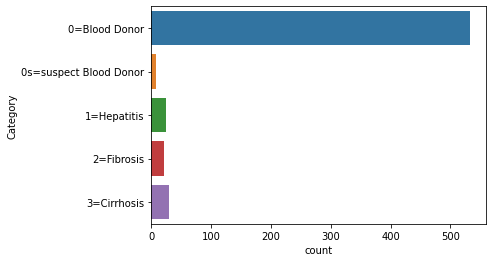

In [7]:
sns.countplot(y='Category', data = hcv)
plt.show()

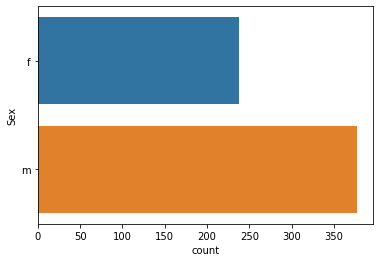

In [8]:
sns.countplot(y='Sex', data=hcv)

In [9]:
# check the values for Os = suspect blood donor 

suspect = hcv.loc[hcv['Category'] == '0s=suspect Blood Donor']
suspect 


,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
533,534,0s=suspect Blood Donor,47,m,22.5,124.0,79.5,46.7,2.3,6.83,4.30,170.0,345.6,58.6
534,535,0s=suspect Blood Donor,48,m,24.9,116.9,49.2,24.3,4.9,3.44,5.25,29.0,83.0,47.8
535,536,0s=suspect Blood Donor,49,m,21.6,42.2,9.5,10.6,2.4,3.75,3.01,64.0,38.9,44.8
536,537,0s=suspect Blood Donor,55,m,47.3,106.0,208.8,130.6,0.8,14.80,8.08,76.0,71.6,78.3
537,538,0s=suspect Blood Donor,71,m,14.9,69.8,19.7,95.2,9.8,13.30,2.61,9.0,7.6,47.0
538,539,0s=suspect Blood Donor,74,m,20.3,84.0,22.8,43.0,5.7,4.91,3.19,52.0,218.3,47.8
539,540,0s=suspect Blood Donor,59,f,19.3,208.2,325.3,146.6,6.9,5.33,4.72,32.0,295.6,53.1


In [10]:
## check the rows where all values are null 

hcv[hcv['ALP'].isnull()]

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
541,542,1=Hepatitis,19,m,41.0,NaN,87.0,67.0,12.0,7.55,3.9,62.0,65.0,75.0
545,546,1=Hepatitis,29,m,49.0,NaN,53.0,39.0,15.0,8.79,3.6,79.0,37.0,90.0
546,547,1=Hepatitis,30,m,45.0,NaN,66.0,45.0,14.0,12.16,6.1,86.0,43.0,77.0
568,569,2=Fibrosis,49,m,39.0,NaN,118.0,62.0,10.0,7.28,3.5,72.0,74.0,81.0
569,570,2=Fibrosis,49,m,46.0,NaN,114.0,75.0,16.0,10.43,5.2,72.0,59.0,82.0
570,571,2=Fibrosis,50,m,42.0,NaN,258.0,106.0,15.0,8.74,4.7,77.0,80.0,84.0
571,572,2=Fibrosis,53,m,46.0,NaN,34.0,43.0,14.0,8.77,4.0,112.0,203.0,76.0
576,577,2=Fibrosis,71,m,37.0,NaN,130.0,90.0,15.0,9.92,4.7,79.0,77.0,76.0
581,582,2=Fibrosis,49,f,39.0,NaN,46.0,39.0,9.0,10.21,3.1,89.0,53.0,79.0
582,583,2=Fibrosis,51,f,37.0,NaN,164.0,70.0,9.0,3.99,4.2,67.0,43.0,72.0


## Perform Encoding for Categorical variables

In [11]:
# use label encoder for male vs female 
from sklearn.preprocessing import LabelEncoder 

#initializer 
label = LabelEncoder()
hcv['Gender'] = label.fit_transform(hcv['Sex'])
hcv

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Gender
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,1
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,1
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,1
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,1
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5,0
611,612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3,0
612,613,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0,0
613,614,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0,0


In [12]:
# Drop rows with Os=suspect blood donor

drop_index = hcv.loc[hcv['Category'] == '0s=suspect Blood Donor'].index
hcv.drop(drop_index, inplace=True)

In [13]:
# create new column for Category to remap values 

hcv_dict = {'0=Blood Donor': 0, '1=Hepatitis' : 1, '2=Fibrosis' : 2, '3=Cirrhosis': 3}

hcv["New Category"] = hcv['Category'].map(hcv_dict).astype('int32')
hcv

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Gender,New Category
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,1,0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,1,0
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,1,0
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,1,0
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5,0,3
611,612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3,0,3
612,613,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0,0,3
613,614,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0,0,3


## Transform Data

In [14]:
# drop rows with null values 

hcv.dropna(how='any', inplace=True)

## split to features and labels/target

X = hcv.iloc[:, 2:-1].drop(columns = 'Sex').to_numpy() # features

y = hcv.iloc[:, -1].to_numpy() # label/target

## Create test train split 

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Generate Model using Naive Bayes Classifier - GaussianNB

In [16]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Inititate Gaussian Classifier
clf = GaussianNB()

# Train the model using the training sets
clf.fit(X_train,y_train)

# perform prediction 

y_pred = clf.predict(X_test)

## Evaluate Model 

In [17]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9222797927461139

## Generate and Evaluate Model using Naive Bayes Classifier - Multinomial

In [18]:
#Import Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB

#Inititate Multinomial Classifier
clf = MultinomialNB()

# Train the model using the training sets
clf.fit(X_train,y_train)

# perform prediction 

y_pred = clf.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9015544041450777

## References 

[UCI Machine Learning Repository - HCV dataset](https://archive.ics.uci.edu/ml/datasets/HCV+data). Accessed 15-Nov-2020.

[Sklearn Naive_Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB). Accessed 15-Nov-2020.

[Sklearn Metrics - accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html?highlight=accuracy#sklearn.metrics.accuracy_score). Accessed 15-Nov-2020.

[Sklearn test_train_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split).Accessed 15-Nov-2020. 

[Naive_Bayes_Classifier](https://en.wikipedia.org/wiki/Naive_Bayes_classifier). Accessed 15-Nov-2020.